In [1]:
import pandas as pd
import logging
logging.getLogger("nltk").setLevel(logging.WARNING) 
from engine import SearchEngine


[nltk_data] Downloading package stopwords to /home/saran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("./dataset/collection_with_abstracts.csv")

search_engine = SearchEngine(vectorizer="hashing", n_features=128)

data = search_engine.search(
    data=data,
    corpus="Abstract", # Corpus column name
    context="Deep Learning", 
    query=["computer vision", "text mining","computer vision text mining"],
)

data["class"].value_counts()


class
computer vision                2641
text mining                    2150
computer vision text mining     657
other                           574
Name: count, dtype: int64

In [3]:
data.head(2)

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract,embeddings,context_score,score_computer_vision,score_text_mining,score_computer_vision_text_mining,class
502,33457181,Deep Learning applications for COVID-19,"Shorten C, Khoshgoftaar TM, Furht B.",J Big Data. 2021;8(1):18. doi: 10.1186/s40537-...,Shorten C,J Big Data,2021,2021/01/18,PMC7797891,NaN,10.1186/s40537-020-00392-9,survey explores Deep Learning battled COVID pa...,"[0.0, 0.0, 0.0, 0.0, 0.051502620262460476, -0....",0.655521,0.218507,0.036418,0.180259,computer vision
6096,28070484,Deep learning predictions of survival based on...,"van der Burgh HK, Schmidt R, Westeneng HJ, de ...",Neuroimage Clin. 2016 Oct 11;13:361-369. doi: ...,van der Burgh HK,Neuroimage Clin,2016,2017/01/11,PMC5219634,NaN,10.1016/j.nicl.2016.10.008,Amyotrophic lateral sclerosis ALS progressive ...,"[0.0, 0.0, 0.0, -0.05143444998736397, 0.0, 0.1...",0.654654,-0.036370,0.109109,0.051434,text mining


# Extract methods implemented in articles


In [4]:
class_queries = {
    "computer vision" : ["multimodal model","multimodal neural network",
                           "vision transformer","diffusion model",
                           "generative diffusion model",
                           "diffusion-based generative model",
                           "continuous diffusion model"],

    "text mining": ["transformer models", "self-attention models" ,
                       "attention-based neural networks",
                       "sequence-to-sequence models"],

    "computer vision text mining":["multimodal model","multimodal neural network",
                "vision transformer",
                "diffusion-based generative model",
                ]
}

data= search_engine.extract_methods(data=data, corpus="Abstract", class_queries=class_queries)

In [11]:
data["method"].value_counts()

method
self-attention models               813
vision transformer                  773
multimodal model                    667
other                               626
diffusion model                     506
transformer models                  505
diffusion-based generative model    471
attention-based neural networks     435
multimodal neural network           396
sequence-to-sequence models         360
continuous diffusion model          253
generative diffusion model          217
Name: count, dtype: int64

In [5]:
data.head(5)

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract,embeddings,context_score,score_computer_vision,score_text_mining,score_computer_vision_text_mining,class,method
502,33457181,Deep Learning applications for COVID-19,"Shorten C, Khoshgoftaar TM, Furht B.",J Big Data. 2021;8(1):18. doi: 10.1186/s40537-...,Shorten C,J Big Data,2021,2021/01/18,PMC7797891,NaN,10.1186/s40537-020-00392-9,survey explores Deep Learning battled COVID pa...,"[0.0, 0.0, 0.0, 0.0, 0.051502620262460476, -0....",0.655521,0.218507,0.036418,0.180259,computer vision,vision transformer
6096,28070484,Deep learning predictions of survival based on...,"van der Burgh HK, Schmidt R, Westeneng HJ, de ...",Neuroimage Clin. 2016 Oct 11;13:361-369. doi: ...,van der Burgh HK,Neuroimage Clin,2016,2017/01/11,PMC5219634,NaN,10.1016/j.nicl.2016.10.008,Amyotrophic lateral sclerosis ALS progressive ...,"[0.0, 0.0, 0.0, -0.05143444998736397, 0.0, 0.1...",0.654654,-0.036370,0.109109,0.051434,text mining,attention-based neural networks
4611,36775719,Deep learning of renal scans in children with ...,"Weaver JK, Logan J, Broms R, Antony M, Rickard...",J Pediatr Urol. 2023 Oct;19(5):514.e1-514.e7. ...,Weaver JK,J Pediatr Urol,2023,2023/02/12,NaN,NaN,10.1016/j.jpurol.2022.12.017,INTRODUCTION Antenatal hydronephrosis ANH one ...,"[0.3363363969981562, -0.06726727939963124, 0.0...",0.618347,0.071348,0.000000,0.050450,computer vision,diffusion model
5391,33862564,Cystic cervical lymph nodes of papillary thyro...,"Onoue K, Fujima N, Andreu-Arasa VC, Setty BN, ...",Am J Otolaryngol. 2021 Sep-Oct;42(5):103026. d...,Onoue K,Am J Otolaryngol,2021,2021/04/16,NaN,NaN,10.1016/j.amjoto.2021.103026,OBJECTIVES Cervical lymph nodes internal cysti...,"[0.28603877677367767, 0.19069251784911848, -0....",0.606780,0.033710,0.000000,0.023837,computer vision,continuous diffusion model
4445,37312249,Survival analysis using deep learning with med...,"Morrison S, Gatsonis C, Eloyan A, Steingrimsso...",Int J Biostat. 2023 Jun 14;20(1):1-12. doi: 10...,Morrison S,Int J Biostat,2023,2023/06/13,PMC11074924,NIHMS1986468,10.1515/ijb-2022-0113,widespread interest using deep learning build ...,"[0.0854357657716761, 0.0, 0.0, 0.0, -0.0854357...",0.604122,0.000000,0.000000,0.000000,computer vision,diffusion-based generative model


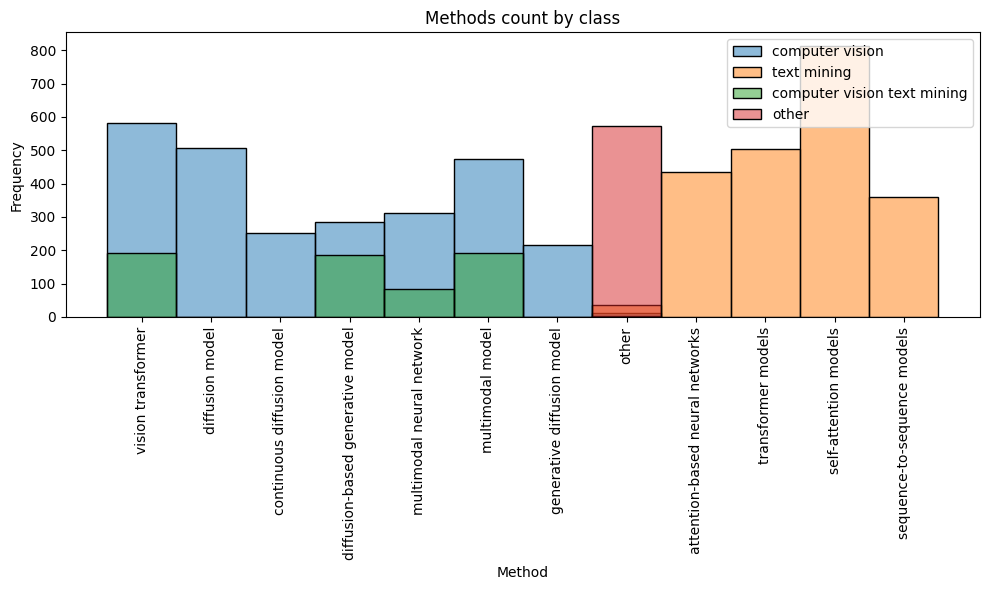

In [6]:
from engine import plot_methods

plot_methods(data=data, save_fig=True)

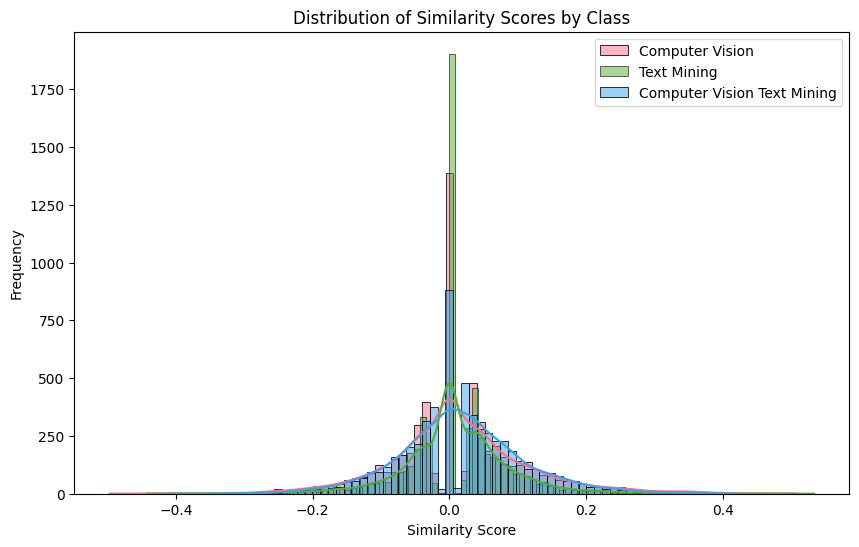

In [7]:
from engine import plot_class_scores

plot_class_scores(
    df=data,
    feature_cols=[
        "score_computer_vision",
        "score_text_mining",
        "score_computer_vision_text_mining",
    ],
    save_fig=True,
)

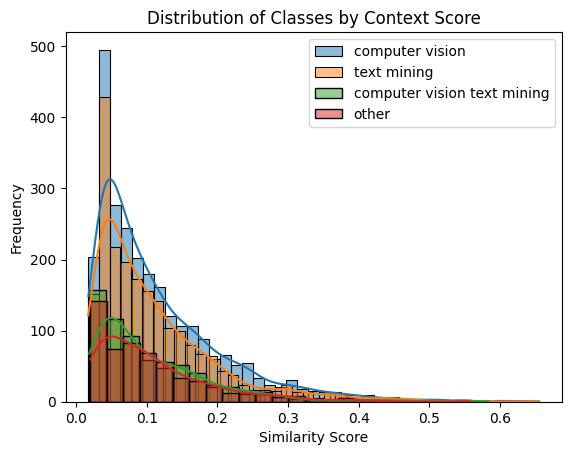

In [8]:
from engine import plot_context_class_scores

plot_context_class_scores(data, save_fig=True)

In [9]:
data.keys()

Index(['PMID', 'Title', 'Authors', 'Citation', 'First Author', 'Journal/Book',
       'Publication Year', 'Create Date', 'PMCID', 'NIHMS ID', 'DOI',
       'Abstract', 'embeddings', 'context_score', 'score_computer_vision',
       'score_text_mining', 'score_computer_vision_text_mining', 'class',
       'method'],
      dtype='object')

In [10]:
from engine import plot_class_clusters

plot_class_clusters(
    data,
    feature_columns=[
        "score_computer_vision",
        "score_text_mining",
        "score_computer_vision_text_mining",
    ],
    class_column="class",
)